In [1]:
import numpy as np
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('/content/citrus.csv')

In [3]:
dataset.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scalar=StandardScaler()

In [6]:
scalar.fit(dataset.drop('name',axis=1))

StandardScaler()

In [7]:
y=scalar.transform(dataset.drop('name',axis=1))

In [8]:
y

array([[-3.60195018, -3.02255396,  1.73997781,  0.76780981, -1.03337209],
       [-3.11420697, -2.978392  ,  1.16484825,  0.16992022, -0.92300682],
       [-2.85236589, -2.73464536,  0.20629897,  0.42615862, -1.03337209],
       ...,
       [ 2.88246734,  2.78833864,  1.3565581 ,  0.51157142,  0.95320276],
       [ 3.05189393,  2.91295068, -1.13567001, -0.34255657, -0.04008467],
       [ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209]])

In [9]:
new=pd.DataFrame(y,columns=dataset.columns[1:])

In [10]:
new

,diameter,weight,red,green,blue
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=new
y=dataset['name']

In [13]:
x

,diameter,weight,red,green,blue
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [14]:
y

0           orange
1           orange
2           orange
3           orange
4           orange
           ...    
9995    grapefruit
9996    grapefruit
9997    grapefruit
9998    grapefruit
9999    grapefruit
Name: name, Length: 10000, dtype: object

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=18)

In [18]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=18)

In [19]:
predict=knn.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(confusion_matrix(Y_test,predict))
print(classification_report(Y_test,predict))

[[1406  118]
 [ 106 1370]]
              precision    recall  f1-score   support

  grapefruit       0.93      0.92      0.93      1524
      orange       0.92      0.93      0.92      1476

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



In [22]:
error_rate=[]

In [23]:
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  predict_i=knn.predict(X_test)
  error_rate.append(np.mean(predict_i !=Y_test))

Text(0, 0.5, 'error rate')

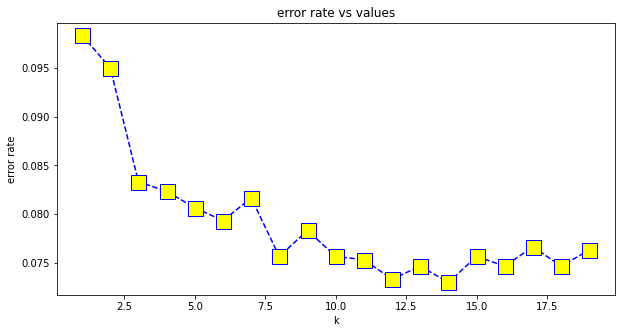

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(1,20),error_rate,color='blue',linestyle='dashed',marker='s',markerfacecolor='yellow',markersize=15)
plt.title('error rate vs values')
plt.xlabel('k')
plt.ylabel('error rate')